In [23]:
%matplotlib inline
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d # 三维画图
import numpy as np
import mypytorch as mp

Text(0, 0.5, 'f(x)')

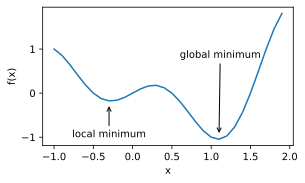

In [7]:
def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig,  = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')

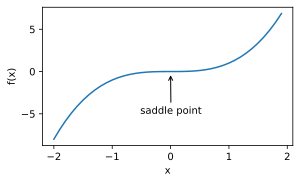

In [3]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');

In [18]:
x, y = np.mgrid[-1: 1: 2j, -1: 1: 2j]  # [start: end: step(j)] j:表示分割个数
x, y

(array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1.,  1.],
        [-1.,  1.]]))

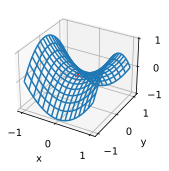

In [21]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

In [22]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x
        results.append(x)
    print('epoch 10: x:', x)
    return results

gd(0.2)

epoch 10: x: 0.06046617599999997


[10,
 6.0,
 3.5999999999999996,
 2.1599999999999997,
 1.2959999999999998,
 0.7775999999999998,
 0.46655999999999986,
 0.2799359999999999,
 0.16796159999999993,
 0.10077695999999996,
 0.06046617599999997]

epoch 10: x: 1.0737418240000003


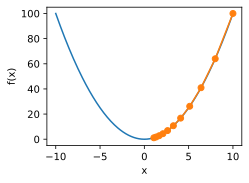

epoch 10: x: 3.4867844009999995


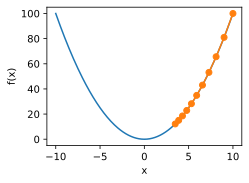

epoch 10: x: 61.917364224000096


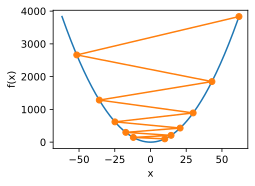

In [27]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    plt.plot(f_line, [x * x for x in f_line])
    plt.plot(res, [x * x for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

show_trace(gd(0.1))
show_trace(gd(0.05))
show_trace(gd(1.1))

In [29]:
results = gd(0.1)
results

epoch 10: x: 1.0737418240000003


[10,
 8.0,
 6.4,
 5.12,
 4.096,
 3.2768,
 2.62144,
 2.0971520000000003,
 1.6777216000000004,
 1.3421772800000003,
 1.0737418240000003]

In [31]:
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态，本章后续几节会使用
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
        print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results


def show_trace_2d(f, results):
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

In [32]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

eta = 0.1
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

In [34]:
results = train_2d(gd_2d)
results

epoch 1, x1 -4.000000, x2 -1.200000
epoch 2, x1 -3.200000, x2 -0.720000
epoch 3, x1 -2.560000, x2 -0.432000
epoch 4, x1 -2.048000, x2 -0.259200
epoch 5, x1 -1.638400, x2 -0.155520
epoch 6, x1 -1.310720, x2 -0.093312
epoch 7, x1 -1.048576, x2 -0.055987
epoch 8, x1 -0.838861, x2 -0.033592
epoch 9, x1 -0.671089, x2 -0.020155
epoch 10, x1 -0.536871, x2 -0.012093
epoch 11, x1 -0.429497, x2 -0.007256
epoch 12, x1 -0.343597, x2 -0.004354
epoch 13, x1 -0.274878, x2 -0.002612
epoch 14, x1 -0.219902, x2 -0.001567
epoch 15, x1 -0.175922, x2 -0.000940
epoch 16, x1 -0.140737, x2 -0.000564
epoch 17, x1 -0.112590, x2 -0.000339
epoch 18, x1 -0.090072, x2 -0.000203
epoch 19, x1 -0.072058, x2 -0.000122
epoch 20, x1 -0.057646, x2 -0.000073


[(-5, -2),
 (-4.0, -1.2),
 (-3.2, -0.72),
 (-2.56, -0.432),
 (-2.048, -0.2592),
 (-1.6384, -0.15552),
 (-1.31072, -0.09331199999999999),
 (-1.0485760000000002, -0.055987199999999994),
 (-0.8388608000000002, -0.033592319999999995),
 (-0.6710886400000001, -0.020155391999999994),
 (-0.5368709120000001, -0.012093235199999997),
 (-0.4294967296000001, -0.007255941119999998),
 (-0.3435973836800001, -0.004353564671999998),
 (-0.27487790694400005, -0.0026121388031999987),
 (-0.21990232555520003, -0.0015672832819199991),
 (-0.17592186044416003, -0.0009403699691519995),
 (-0.140737488355328, -0.0005642219814911997),
 (-0.11258999068426241, -0.00033853318889471976),
 (-0.09007199254740993, -0.00020311991333683184),
 (-0.07205759403792794, -0.0001218719480020991),
 (-0.057646075230342354, -7.312316880125945e-05)]

In [36]:
zip(*results)